<a href="https://colab.research.google.com/github/pooJa-verMa14/Machine-Learning/blob/main/LabEval1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#importing some important libraries

# importing panda library which is helpfull for handling csv files 
import pandas as pd 

#importing numpy library which is also known as linear algebra library
import numpy as np

#importing matplotlib helpfull for plotting the data
import matplotlib.pyplot as plt

#importing seaborn helpfull for plotting the data
import seaborn as sns

# matl library is usefl for maths functions
import math

# importing train test split from sklearn
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# importing library for scaling methods
import scipy.stats as stats

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [37]:
# loading the data into dataframe
df = pd.read_csv('/content/default of credit card clients.csv')

In [38]:
# printing first 10 rows of data
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [39]:
print(f"Number of rows ==> {df.shape[0]} and number of columns ==> {df.shape[1]}")

Number of rows ==> 30000 and number of columns ==> 25


In [40]:
# Checking null values in the data
print(f"Number of null values in each columns :")
df.isnull().sum()

Number of null values in each columns :


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [68]:
# Since there are no null values corresponding to each column so there is no need for handling null values

print("Removing redundant data :")
print("Befor removing redundant data")
print(f"Number of rows ==> {df.shape[0]} and number of columns ==> {df.shape[1]}")

df.drop_duplicates () 
print("After removing redundant data")
print(f"Number of rows ==> {df.shape[0]} and number of columns ==> {df.shape[1]}")

Removing redundant data :
Befor removing redundant data
Number of rows ==> 30000 and number of columns ==> 25
After removing redundant data
Number of rows ==> 30000 and number of columns ==> 25


In [69]:
# dropiing the id column
df1 = df.drop(['ID'],axis=1)

In [70]:
df1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


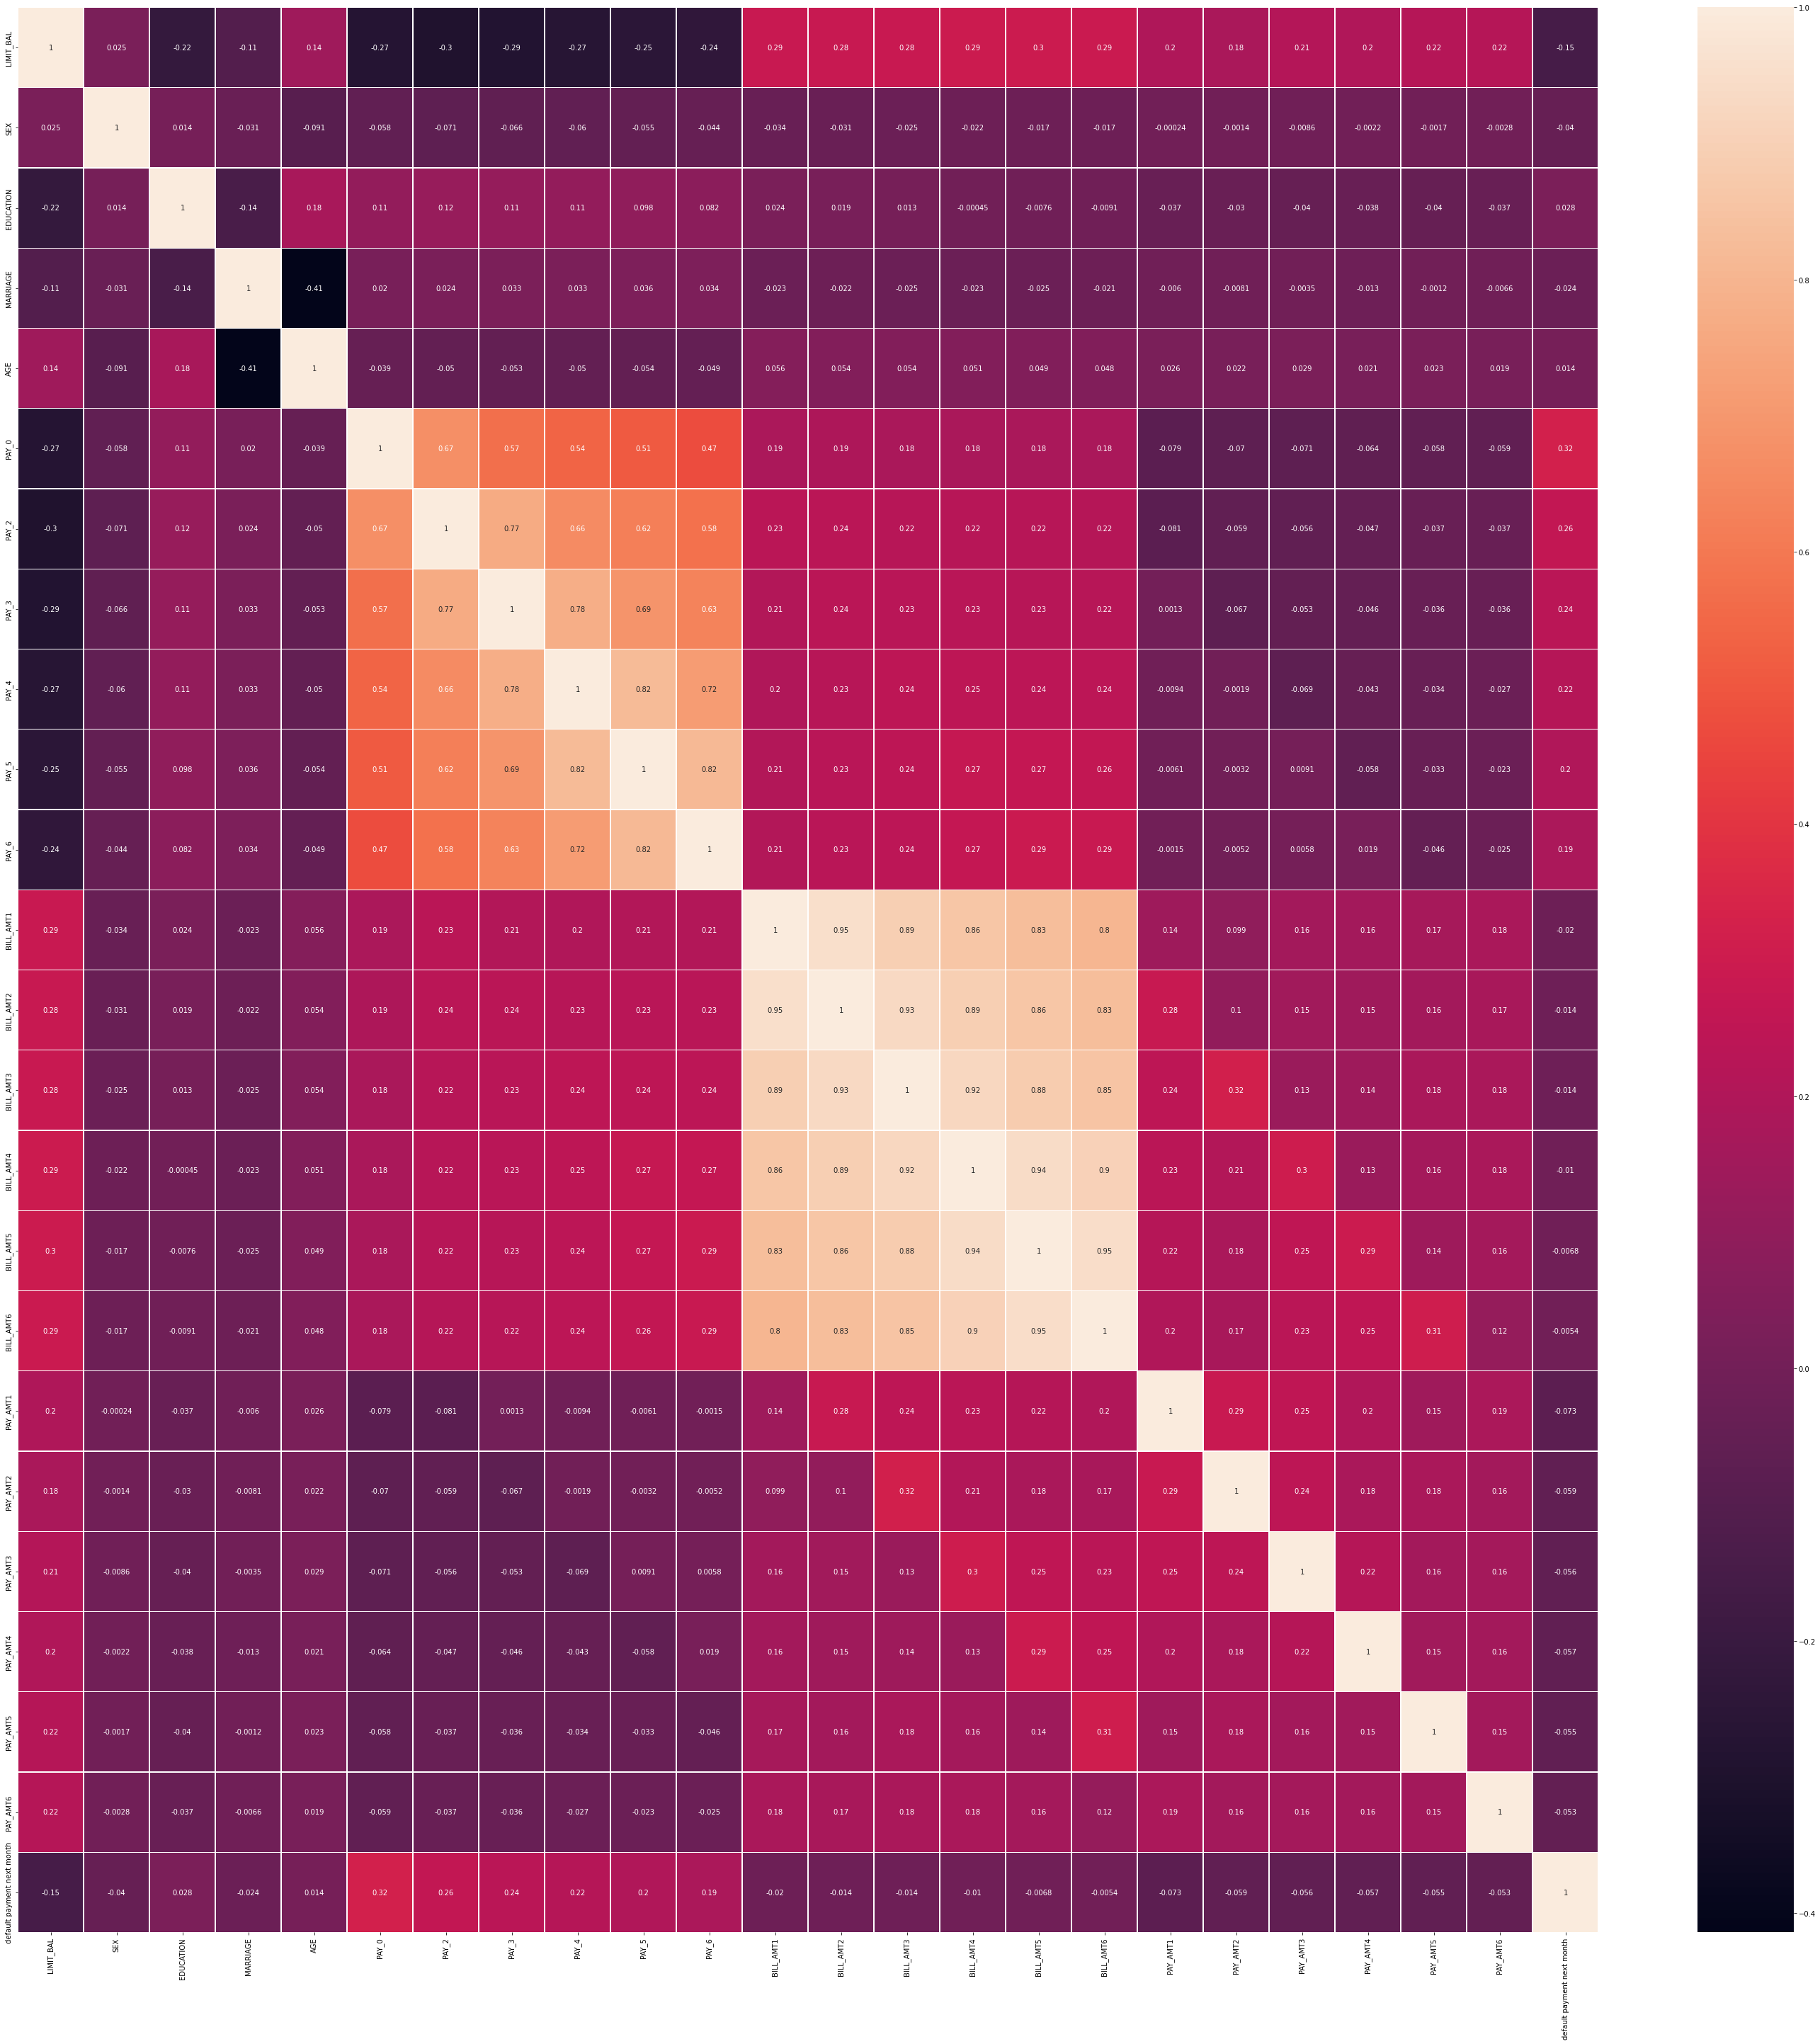

In [71]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(50, 50))
dataplot = sns.heatmap(df1.corr(),linewidths=.3,annot=True)
  
# displaying heatmap
plt.show()

In [72]:
#Dropping highly correlated columns
df2 = df1.drop(['PAY_6','PAY_4','BILL_AMT1','PAY_3','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_2'],axis=1)

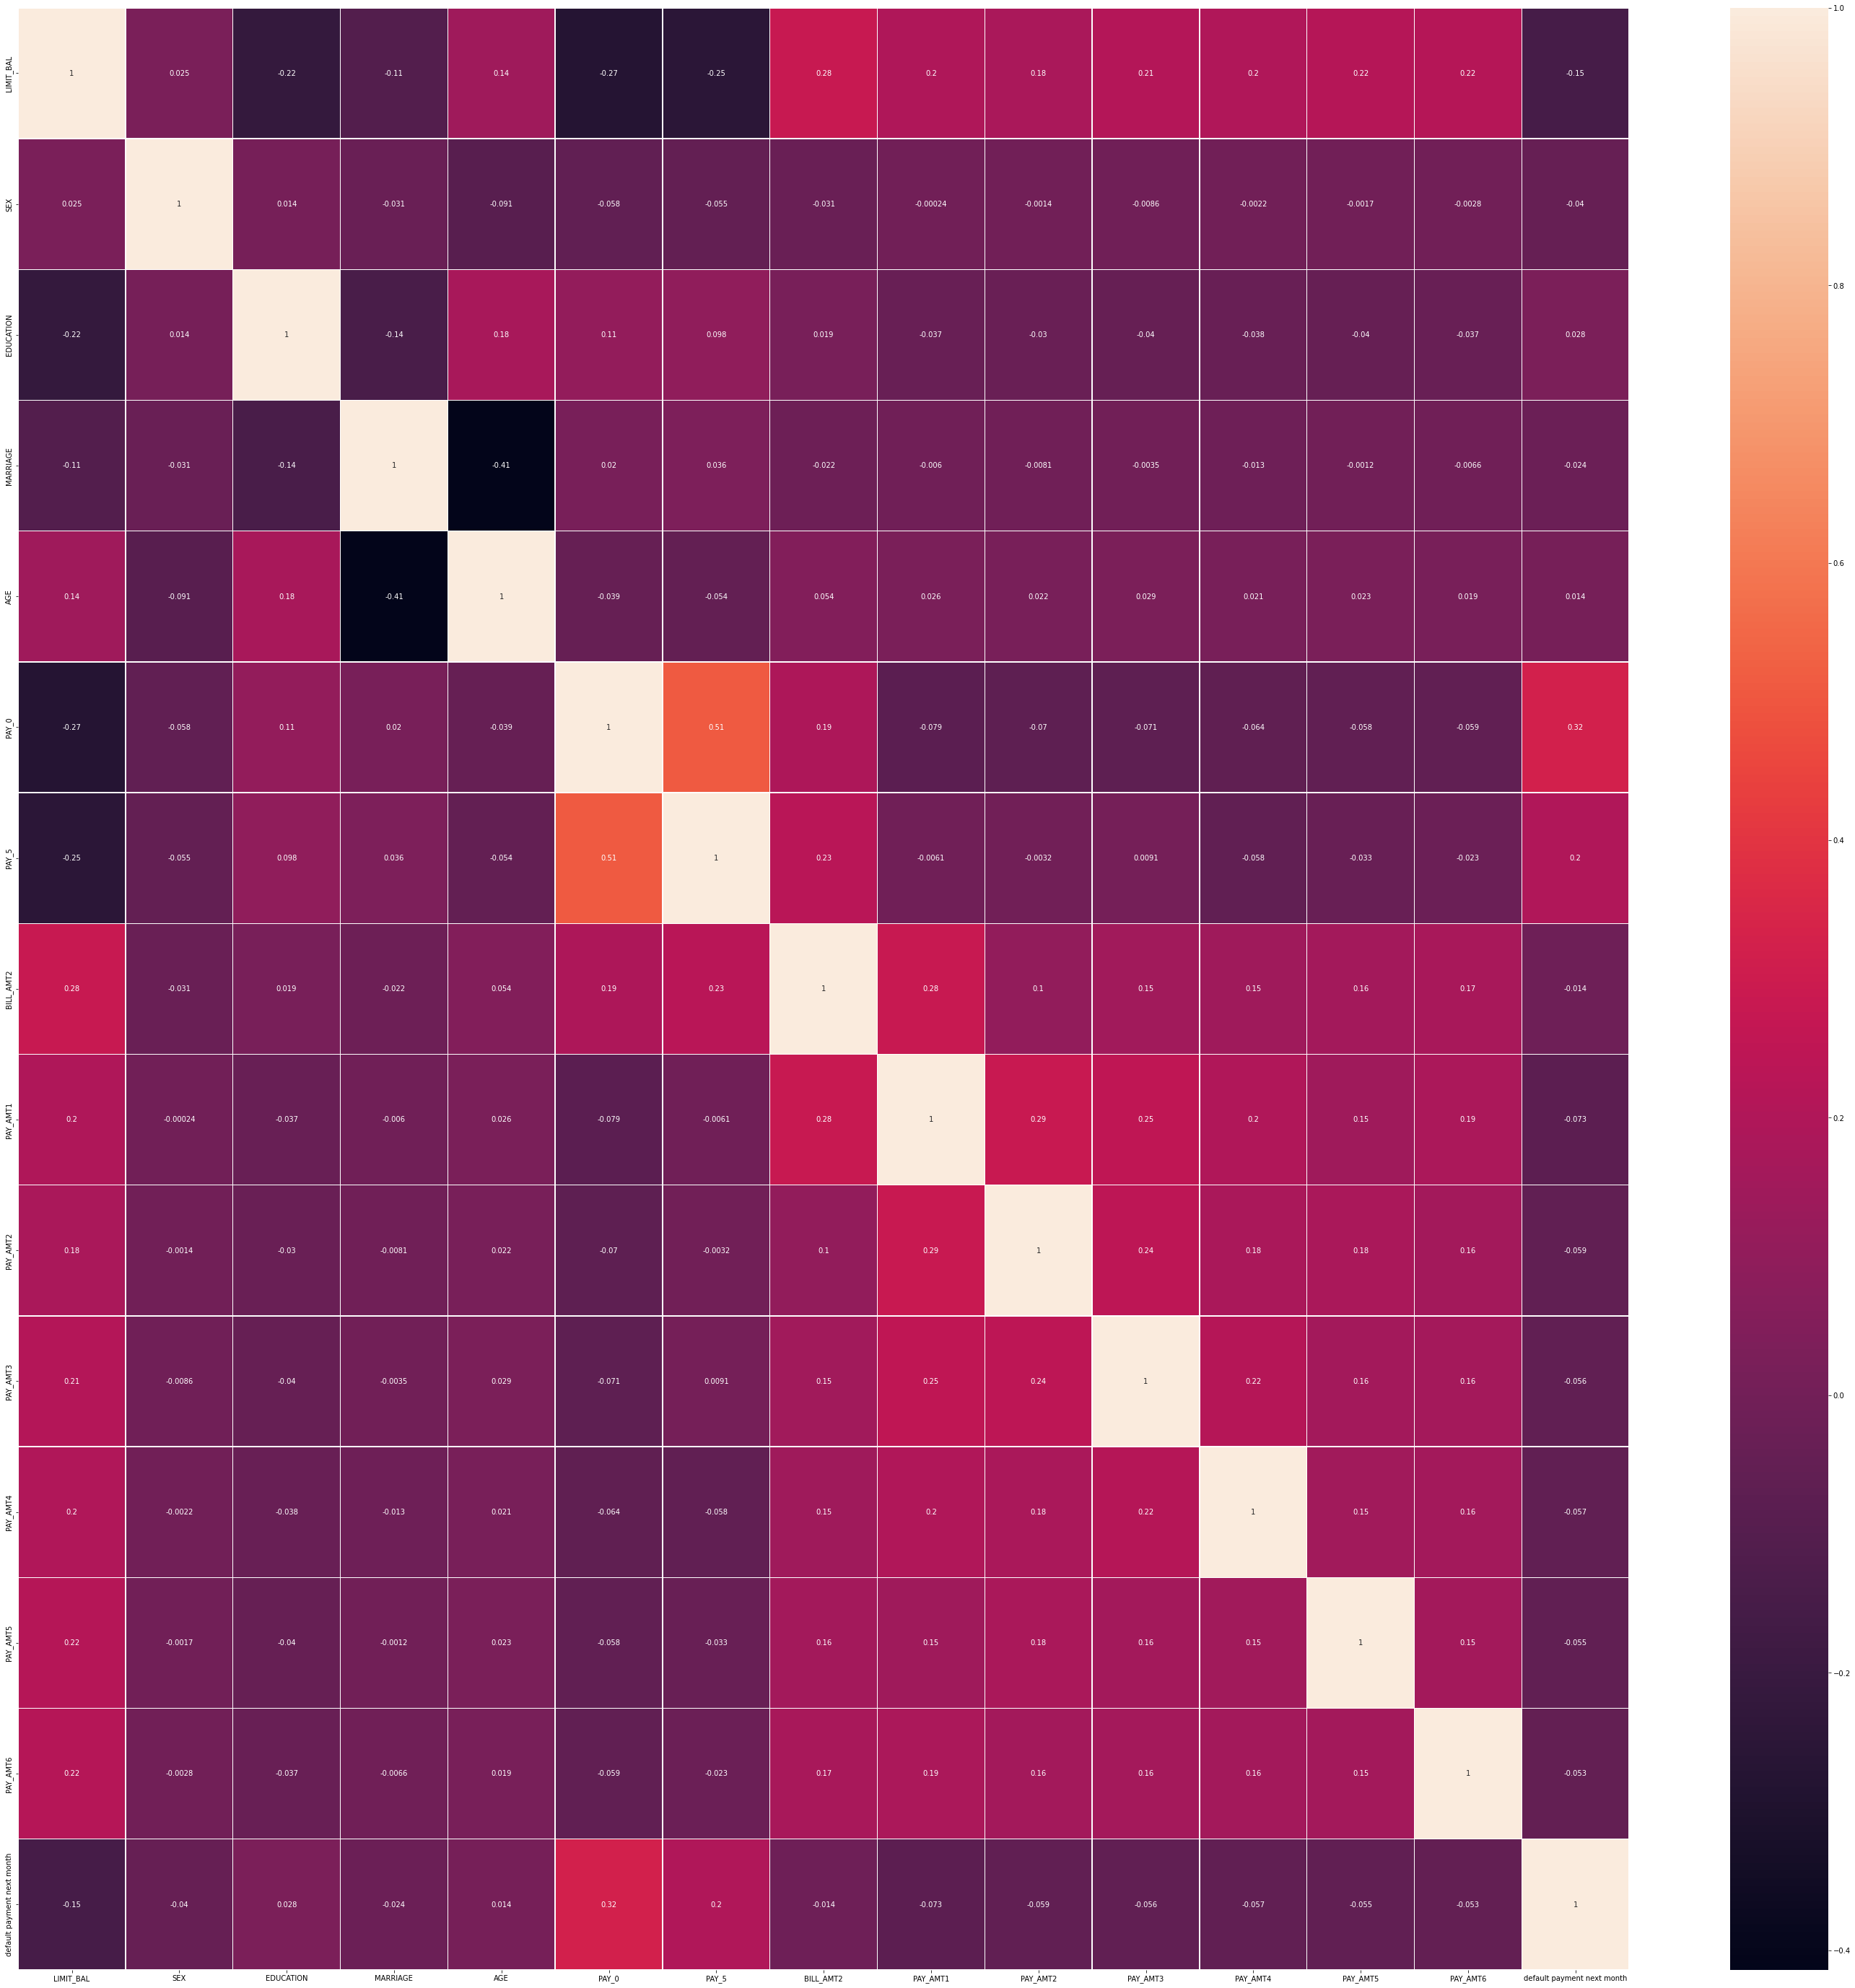

In [73]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(50, 50))
dataplot = sns.heatmap(df2.corr(),linewidths=.3,annot=True)
  
# displaying heatmap
plt.show()

In [74]:
df2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_5,BILL_AMT2,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.266200,49179.075167,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.133187,71173.768783,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-69777.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,2984.750000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,21200.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,64006.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,983931.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [75]:
# normalizing some features 
df2['AGE']=stats.zscore(df2['AGE'])
df2['BILL_AMT2']=stats.zscore(df2['BILL_AMT2'])
df2['PAY_AMT1']=stats.zscore(df2['PAY_AMT1'])
df2['PAY_AMT3']=stats.zscore(df2['PAY_AMT3'])
df2['PAY_AMT4']=stats.zscore(df2['PAY_AMT4'])
df2['PAY_AMT5']=stats.zscore(df2['PAY_AMT5'])
df2['PAY_AMT6']=stats.zscore(df2['PAY_AMT6'])
df2['LIMIT_BAL']=stats.zscore(df2['LIMIT_BAL'])

In [76]:
df2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_5,BILL_AMT2,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,-6.063298e-17,1.603733,1.853133,1.551867,-1.856885e-16,-0.016700,-0.266200,-3.789561e-17,-4.736952e-18,5.921163e+03,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,0.221200
std,1.000017e+00,0.489129,0.790349,0.521970,1.000017e+00,1.123802,1.133187,1.000017e+00,1.000017e+00,2.304087e+04,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062
min,-1.213794e+00,1.000000,0.000000,0.000000,-1.571479e+00,-2.000000,-2.000000,-1.671375e+00,-3.419416e-01,0.000000e+00,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000
25%,-9.054983e-01,1.000000,1.000000,1.000000,-8.120745e-01,-1.000000,-1.000000,-6.490466e-01,-2.815661e-01,8.330000e+02,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000
50%,-2.118326e-01,2.000000,2.000000,2.000000,-1.611565e-01,0.000000,0.000000,-3.931159e-01,-2.151530e-01,2.009000e+03,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000
75%,5.589071e-01,2.000000,2.000000,2.000000,5.982479e-01,0.000000,0.000000,2.083271e-01,-3.970176e-02,5.000000e+03,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000
max,6.416528e+00,2.000000,6.000000,3.000000,4.720729e+00,8.000000,8.000000,1.313360e+01,5.239921e+01,1.684259e+06,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000


In [78]:
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_5',
       'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [79]:
x = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_5',
       'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']
y = ['default payment next month']
# slpiting the data
x_train,x_test,y_train,y_test=train_test_split(df2[x],df2[y],test_size=0.33,random_state=42)

In [80]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [81]:
y_pred = lr_model.predict(x_test)

In [82]:
print("Accuracy on training set:", lr_model.score(x_train, y_train))
print("Accuracy on test set:", lr_model.score(x_test, y_test))

Accuracy on training set: 0.8099502487562189
Accuracy on test set: 0.8073737373737374


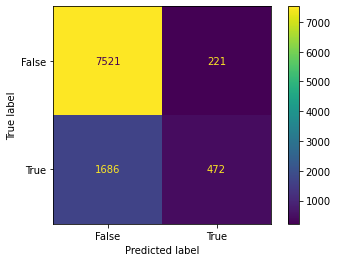

In [83]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [84]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.807374
recall,0.218721
precision,0.681097
roc_auc_score,0.595088


In [98]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(x_train, y_train)
THRESHOLD = 0.55
preds = np.where(clf.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
accuracy,0.790202
recall,0.497220
precision,0.519613
roc_auc_score,0.684544


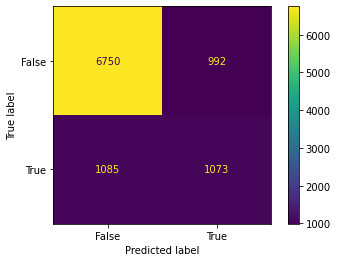

In [99]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()